In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [180]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [38]:
df.shape

(29922, 6)

In [39]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

In [89]:
df.sort_values('quantity').head()

,order_id,name,ordered_at,price,quantity,line_total
26134,18761,"""ICE CREAM"" Dark Chocolate",2018-07-02 09:47:57,4.0,1,4.0
25866,18676,"""CONE"" Cookie Cone",2018-06-30 09:38:43,4.0,1,4.0
11936,13982,"""ICE CREAM"" Candied Bacon",2018-03-25 14:26:04,0.5,1,0.5
11937,13983,"""ICE CREAM"" Vanilla Bean",2018-03-25 15:04:05,1.5,1,1.5
11942,13984,"""BEVERAGE"" Iced Coffee",2018-03-25 15:31:37,2.5,1,2.5


In [181]:
df['name'].value_counts()

"ICE CREAM" Mint Chip             1131
"SORBET" Lemon                    1113
"ICE CREAM" Candied Bacon         1110
"ICE CREAM" Dark Chocolate        1092
"CONE" Sugar Cone                 1086
"ICE CREAM" Double Fudge Chunk    1081
"CONE" Cookie Cone                1080
"SORBET" Raspberry                1077
"ICE CREAM" Rocky Road            1077
"SORBET" Blood Orange             1062
"CONE" Dipped Waffle Cone         1061
"ICE CREAM" Maple Brown Sugar     1054
"BEVERAGE" Iced Coffee            1053
"ICE CREAM" Dulce De Leche        1052
"ICE CREAM" Wildberry             1051
"CONE" Brownie Cone               1048
"ICE CREAM" Vanilla Bean          1044
"ICE CREAM" Matcha                1035
"SORBET" Lychee                   1029
"BEVERAGE" Espresso               1026
"SORBET" Watermelon               1024
"ICE CREAM" Earl Gray             1023
"ICE CREAM" Strawberry            1020
"ICE CREAM" Peanut Fudge          1010
"CONE" Waffle Cone                1003
"MISC" Ice Cream Cake    

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [182]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [184]:
df['price'] = df['price'].replace('[^.0-9]', '', regex=True).astype(float)
df['line_total'] = df['line_total'].replace('[^.0-9]', '', regex=True).astype(float)

In [42]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [186]:
df[df.duplicated()].shape[0]

0

In [185]:
df = df.dropna()
df = df.drop_duplicates()

In [187]:
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [188]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [193]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

0

In [190]:
df[df['line_total'] < 0].shape[0]

0

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [191]:
df.loc[df['price'] * df['quantity'] != df['line_total'], "line_total"] = df['price'] * df['quantity']

In [192]:
df.describe()

,order_id,price,quantity,line_total
count,27892.000000,27892.000000,27892.000000,27892.000000
mean,14992.479026,2.512333,2.001040,5.031765
std,2889.913777,1.059432,0.819061,3.087248
min,10000.000000,0.500000,1.000000,0.500000
25%,12496.000000,1.500000,1.000000,2.500000
50%,14972.000000,2.500000,2.000000,4.500000
75%,17508.250000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [196]:
#df["name"].str.replace("^\"","").str.split("\" ")
ndf = df["name"].str.extract(r'^"(?P<category>.+)" (?P<name>.+)')
df["name"] = ndf["name"]
df["category"] = ndf["category"]

In [199]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


#### Analysis, finally!

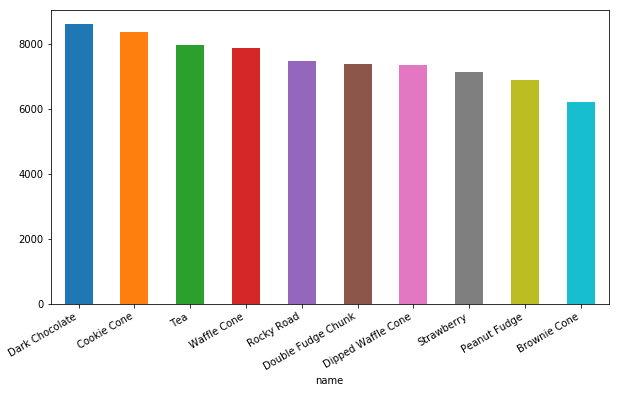

In [198]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()